<a href="https://colab.research.google.com/github/manaf2808/BGP_ML/blob/main/(LR_NV_SVM_AdaBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC

# **Load Raw Data**

In [ ]:
df = pd.read_csv('/content/Slammer.csv')

new_column_names = ['Hour+Min', 'Hour', 'Min', 'Sec','1.Number of announcements', '2.Number of withdrawals', '3.Number of announced NLRI prefixes', '4.Number of withdrawn NLRI prefixes', '5.Average AS-path length', '6.Maximum AS-path length', '7.Average unique AS-path length', '8.Number of duplicate announcements', '9.Number of implicit withdrawals', '10.Number of duplicate withdrawals', '11.Maximum edit distance', '12Iter-Arrival rate','13.Maximum edit distance = 7', '14.Maximum edit distance = 8', '15.Maximum edit distance = 9', '16.Maximum edit distance = 10', '17.Maximum edit distance = 11', '18.Maximum edit distance = 12', '19.Maximum edit distance = 13', '20.Maximum edit distance = 14', '21.Maximum edit distance = 15', '22.Maximum edit distance = 16', '23.Maximum edit distance = 17','24.Maximum AS-path length = 7', '25.Maximum AS-path length = 8', '26.Maximum AS-path length = 9', '27.Maximum AS-path length = 10', '28.Maximum AS-path length = 11', '29.Maximum AS-path length = 12', '30.Maximum AS-path length = 13', '31.Maximum AS-path length = 14', '32.Maximum AS-path length = 15', '33.Maximum AS-path length = 16', '34.Number of (IGP) packets', '35.Number of (EGP) packets','36.Number of incomplete packets', '37.Packet size (B)', 'labels']
df.columns = new_column_names

X = df.drop(df.columns[:4].tolist() + ['labels'], axis=1)
y = df['labels'].values

In [ ]:
positive_count = sum(y == 1)
negative_count = sum(y == -1)

print("Positive instances:", positive_count)
print("Negative instances:", negative_count)

Positive instances: 869
Negative instances: 6330


# **Training Set**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

positive_count = sum(y_train == 1)
negative_count = sum(y_train == -1)

print("Positive instances:", positive_count)
print("Negative instances:", negative_count)

Positive instances: 701
Negative instances: 5058


# **Models Raw Data**

## **Logsitic Regression**

In [ ]:
# Create an Logstic Regression classifier
classifier = LogisticRegression()

start_time = time.time()
# Train the classifier using the training data
classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Obtain the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)
print("Training Time:", training_time, "seconds")

Accuracy: 0.9486111111111111
Confusion Matrix:
[[1255   17]
 [  57  111]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.99      0.97      1272
           1       0.87      0.66      0.75       168

    accuracy                           0.95      1440
   macro avg       0.91      0.82      0.86      1440
weighted avg       0.95      0.95      0.95      1440

Training Time: 0.1140298843383789 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Naive Bayes**

In [ ]:
from sklearn.metrics import classification_report
# Create an NB classifier
classifier = GaussianNB()


start_time = time.time()
# Train the classifier using the training data
classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Obtain the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

print("Training Time:", training_time, "seconds")

Accuracy: 0.8791666666666667
Confusion Matrix:
[[1123  149]
 [  25  143]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.88      0.93      1272
           1       0.49      0.85      0.62       168

    accuracy                           0.88      1440
   macro avg       0.73      0.87      0.77      1440
weighted avg       0.92      0.88      0.89      1440

Training Time: 0.018706321716308594 seconds


## **SVM Different Kernels**

In [ ]:
from sklearn.metrics import classification_report
# Define the kernel functions to test
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']

# Test different kernel functions
for kernel in kernel_functions:
    # Train the SVM model and measure the time taken
    start_time = time.time()
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    end_time = time.time()

    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)

    # Print the classification report and confusion matrix
    print("Kernel Function: ", kernel)
    print(classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report.items():
        if label.isdigit():
            for metric, value in metrics.items():
                if metric != 'support':
                    print(f"{metric.capitalize()} ({label}): {value:.2%}")
    print(confusion_matrix(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2%}".format(accuracy))
    print("Time taken to train: {:.2f} seconds\n".format(end_time - start_time))

Kernel Function:  linear
              precision    recall  f1-score   support

          -1       0.97      0.98      0.97      1272
           1       0.84      0.75      0.79       168

    accuracy                           0.95      1440
   macro avg       0.90      0.87      0.88      1440
weighted avg       0.95      0.95      0.95      1440

Precision (1): 84.00%
Recall (1): 75.00%
F1-score (1): 79.25%
[[1248   24]
 [  42  126]]
Accuracy: 95.42%
Time taken to train: 380.31 seconds

Kernel Function:  poly
              precision    recall  f1-score   support

          -1       0.95      0.99      0.97      1272
           1       0.92      0.58      0.71       168

    accuracy                           0.94      1440
   macro avg       0.93      0.79      0.84      1440
weighted avg       0.94      0.94      0.94      1440

Precision (1): 91.51%
Recall (1): 57.74%
F1-score (1): 70.80%
[[1263    9]
 [  71   97]]
Accuracy: 94.44%
Time taken to train: 0.18 seconds

Kernel Functio

# **Models Feature Selection**

## **Feature Selection Using PPFS**

Library Install

In [ ]:
!pip install PyImpetus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from collections import Counter
from PyImpetus import PPIMBC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### FeatureSelection

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20

Markov Blanket:  ['5.Average AS-path length', '1.Number of announcements', '3.Number of announced NLRI prefixes', '9.Number of implicit withdrawals', '10.Number of duplicate withdrawals', '34.Number of (IGP) packets', '36.Number of incomplete packets', '8.Number of duplicate announcements', '11.Maximum edit distance', '2.Number of withdrawals', '4.Number of withdrawn NLRI prefixes', '13.Maximum edit distance = 7', '27.Maximum AS-path length = 10', '32.Maximum AS-path length = 15', '37.Packet size (B)', '18.Maximum edit distance = 12']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 12.764331322530797, 11.917033462143593, 9.3856067967207, 7.946741548591471, 5.881552029618836, 5.483634127146055, 4.424910053209942, 4.213961286420002, 4.11144241566066]


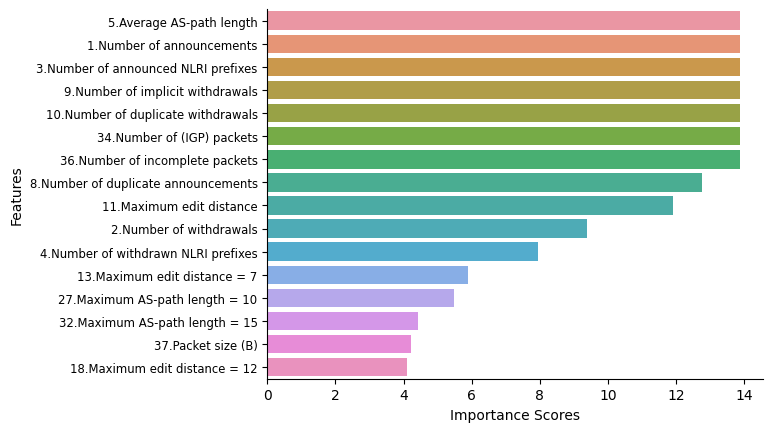

Score:  0.9597222222222223


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20

Markov Blanket:  ['5.Average AS-path length', '1.Number of announcements', '3.Number of announced NLRI prefixes', '9.Number of implicit withdrawals', '10.Number of duplicate withdrawals', '34.Number of (IGP) packets', '36.Number of incomplete packets', '8.Number of duplicate announcements', '11.Maximum edit distance', '2.Number of withdrawals', '4.Number of withdrawn NLRI prefixes', '13.Maximum edit distance = 7', '27.Maximum AS-path length = 10', '32.Maximum AS-path length = 15', '37.Packet size (B)', '18.Maximum edit distance = 12']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 12.764331322530797, 11.917033462143593, 9.3856067967207, 7.946741548591471, 5.881552029618836, 5.483634127146055, 4.424910053209942, 4.213961286420002, 4.11144241566066]


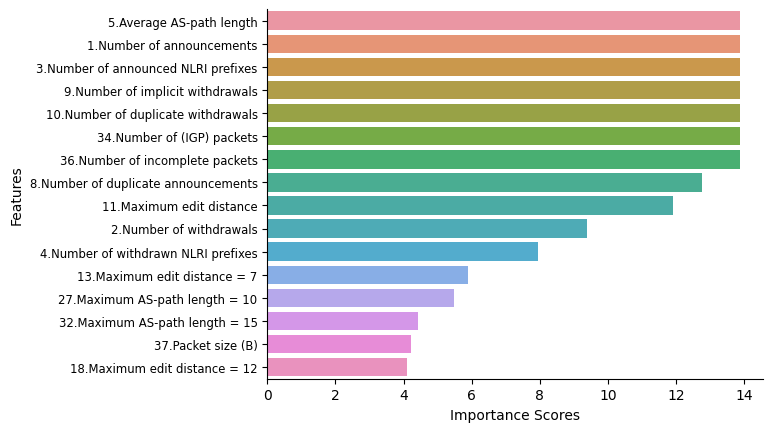

Score:  0.9597222222222223


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20

Markov Blanket:  ['5.Average AS-path length', '1.Number of announcements', '3.Number of announced NLRI prefixes', '9.Number of implicit withdrawals', '10.Number of duplicate withdrawals', '34.Number of (IGP) packets', '36.Number of incomplete packets', '8.Number of duplicate announcements', '11.Maximum edit distance', '2.Number of withdrawals', '4.Number of withdrawn NLRI prefixes', '13.Maximum edit distance = 7', '27.Maximum AS-path length = 10', '32.Maximum AS-path length = 15', '37.Packet size (B)', '18.Maximum edit distance = 12']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 12.764331322530797, 11.917033462143593, 9.3856067967207, 7.946741548591471, 5.881552029618836, 5.483634127146055, 4.424910053209942, 4.213961286420002, 4.11144241566066]


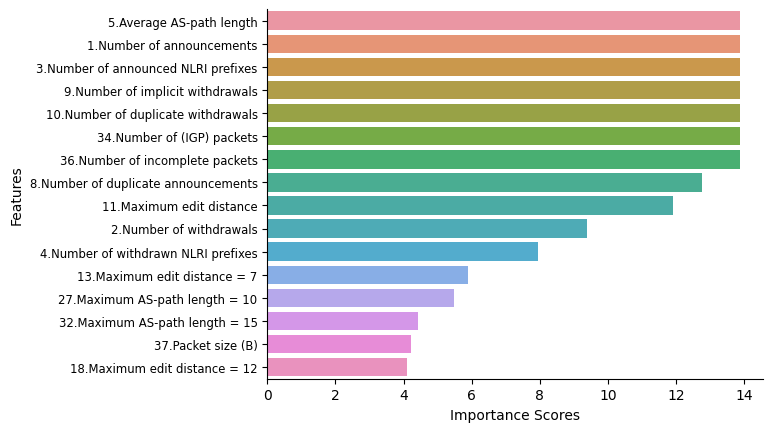

Score:  0.9597222222222223


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20

Markov Blanket:  ['5.Average AS-path length', '1.Number of announcements', '3.Number of announced NLRI prefixes', '9.Number of implicit withdrawals', '10.Number of duplicate withdrawals', '34.Number of (IGP) packets', '36.Number of incomplete packets', '8.Number of duplicate announcements', '11.Maximum edit distance', '2.Number of withdrawals', '4.Number of withdrawn NLRI prefixes', '13.Maximum edit distance = 7', '27.Maximum AS-path length = 10', '32.Maximum AS-path length = 15', '37.Packet size (B)', '18.Maximum edit distance = 12']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 12.764331322530797, 11.917033462143593, 9.3856067967207, 7.946741548591471, 5.881552029618836, 5.483634127146055, 4.424910053209942, 4.213961286420002, 4.11144241566066]


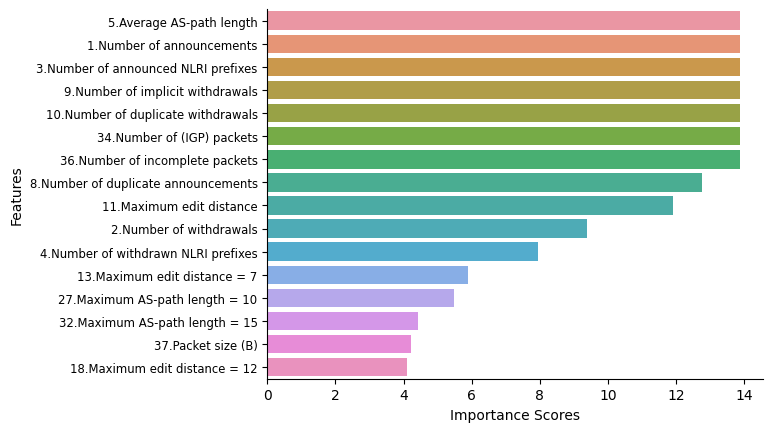

Score:  0.9597222222222223


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20

Markov Blanket:  ['5.Average AS-path length', '1.Number of announcements', '3.Number of announced NLRI prefixes', '9.Number of implicit withdrawals', '10.Number of duplicate withdrawals', '34.Number of (IGP) packets', '36.Number of incomplete packets', '8.Number of duplicate announcements', '11.Maximum edit distance', '2.Number of withdrawals', '4.Number of withdrawn NLRI prefixes', '13.Maximum edit distance = 7', '27.Maximum AS-path length = 10', '32.Maximum AS-path length = 15', '37.Packet size (B)', '18.Maximum edit distance = 12']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 12.764331322530797, 11.917033462143593, 9.3856067967207, 7.946741548591471, 5.881552029618836, 5.483634127146055, 4.424910053209942, 4.213961286420002, 4.11144241566066]


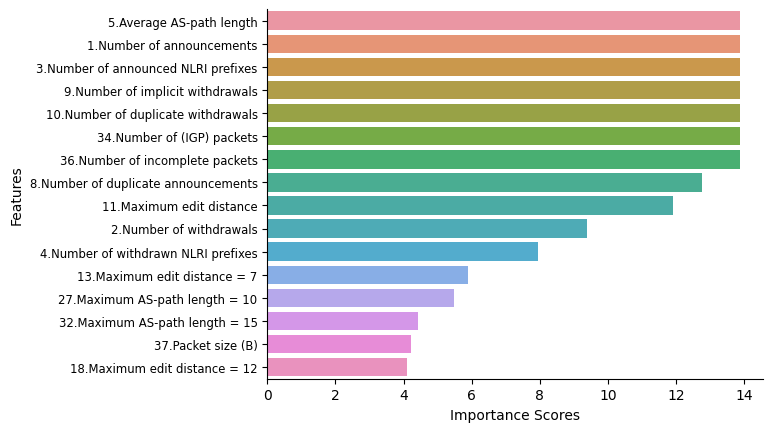

Score:  0.9597222222222223


Average Accuracy:  0.9597222222222224


Total Time Required (in seconds):  1024.809201002121


In [ ]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(X_train):
    # Split data into train and test based on folds
    x_train, x_test = X_train, X_test
    y_train, y_test = y_train, y_test

    # Create a PyImpetus classification object and initialize with required parameters
    # NOTE: To achieve fast selection, set cv=0 for disabling the use of any internal cross-validation
    model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), cv=0, num_simul=20, simul_type=0, simul_size=0.2, sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.05)
    # Fit this above object on the train part and transform the train dataset into selected feature subset
    # NOTE: x_train has to be a dataframe and y_train has to be a numpy array
    x_train = model.fit_transform(x_train, y_train)
    # Transform the test set as well
    # NOTE: x_test has to be a dataframe
    x_test = model.transform(x_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    # NOTE: You can use these scores ina feature selection ensemble
    print("Feature importance: ", model.feat_imp_scores)
    # Plot the feature importance scores
    model.feature_importance()
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values

    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

Feature Selection Results:

In [ ]:
features_ranked = ['5.Average AS-path length', '1.Number of announcements', '3.Number of announced NLRI prefixes', '9.Number of implicit withdrawals', '10.Number of duplicate withdrawals', '34.Number of (IGP) packets', '36.Number of incomplete packets', '8.Number of duplicate announcements', '11.Maximum edit distance', '2.Number of withdrawals', '4.Number of withdrawn NLRI prefixes', '13.Maximum edit distance = 7', '27.Maximum AS-path length = 10', '32.Maximum AS-path length = 15', '37.Packet size (B)', '18.Maximum edit distance = 12']

selected_features = features_ranked[:10]
selected_df = df[selected_features + ['labels']].copy()

X_select = selected_df[selected_features]
y_select = selected_df['labels']

FeatSelection_Training set

In [ ]:
# Split the data into training and testing sets
X_trainselect, X_testselect, y_trainselect, y_testselect = train_test_split(X_select, y_select, test_size=0.2, random_state=0)

positive_count = sum(y_train == 1)
negative_count = sum(y_train == -1)

print("Positive instances:", positive_count)
print("Negative instances:", negative_count)

Positive instances: 701
Negative instances: 5058


## **Logistic Regression FeatSelct**

In [ ]:
from sklearn.metrics import classification_report

# Create an SVM classifier
classifier = LogisticRegression()

start_time = time.time()
# Train the classifier using the training data
classifier.fit(X_trainselect, y_trainselect)
training_time = time.time() - start_time

# Make predictions on the testing data
y_predselectlr = classifier.predict(X_testselect)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_testselect, y_predselectlr)
print("Accuracy:", accuracy)

# Obtain the confusion matrix
cm = confusion_matrix(y_testselect, y_predselectlr)
print("Confusion Matrix:")
print(cm)

#Classification report
classification_report = classification_report(y_testselect, y_predselectlr)
print("Classification Report:")
print(classification_report)
print("Training Time:", training_time, "seconds")


Accuracy: 0.9444444444444444
Confusion Matrix:
[[1241   15]
 [  65  119]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.99      0.97      1256
           1       0.89      0.65      0.75       184

    accuracy                           0.94      1440
   macro avg       0.92      0.82      0.86      1440
weighted avg       0.94      0.94      0.94      1440

Training Time: 0.16451787948608398 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Naive Bayes FeatSelct**

In [ ]:
from sklearn.metrics import classification_report
# Create an SVM classifier
classifier = GaussianNB()

start_time = time.time()
# Train the classifier using the training data
classifier.fit(X_trainselect, y_trainselect)
training_time = time.time() - start_time

# Make predictions on the testing data
y_predselectnb = classifier.predict(X_testselect)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_testselect, y_predselectnb)
print("Accuracy:", accuracy)

# Obtain the confusion matrix
cm = confusion_matrix(y_testselect, y_predselectnb)
print("Confusion Matrix:")
print(cm)

#Classification report
classification_report = classification_report(y_testselect, y_predselectnb)
print("Classification Report:")
print(classification_report)

print("Training Time:", training_time, "seconds")

Accuracy: 0.9284722222222223
Confusion Matrix:
[[1230   26]
 [  77  107]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.98      0.96      1256
           1       0.80      0.58      0.68       184

    accuracy                           0.93      1440
   macro avg       0.87      0.78      0.82      1440
weighted avg       0.92      0.93      0.92      1440

Training Time: 0.00469517707824707 seconds


## **SVM Different Kernels FeatSelct**

In [ ]:
from sklearn.metrics import classification_report
# Define the kernel functions to test
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']

# Test different kernel functions
for kernel in kernel_functions:
    # Train the SVM model and measure the time taken
    start_time = time.time()
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_trainselect, y_trainselect)
    end_time = time.time()

    # Make predictions on the test data
    y_predselectsvm = svm_model.predict(X_testselect)

    # Print the classification report and confusion matrix
    print("Kernel Function: ", kernel)
    print(classification_report(y_testselect, y_predselectsvm))
    report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report.items():
        if label.isdigit():
            for metric, value in metrics.items():
                if metric != 'support':
                    print(f"{metric.capitalize()} ({label}): {value:.2%}")
    print(confusion_matrix(y_testselect, y_predselectsvm))
    accuracy = accuracy_score(y_testselect, y_predselectsvm)
    print("Accuracy: {:.2%}".format(accuracy))
    print("Time taken to train: {:.2f} seconds\n".format(end_time - start_time))

Kernel Function:  linear
              precision    recall  f1-score   support

          -1       0.95      0.99      0.97      1256
           1       0.87      0.64      0.74       184

    accuracy                           0.94      1440
   macro avg       0.91      0.81      0.85      1440
weighted avg       0.94      0.94      0.94      1440

Precision (1): 42.14%
Recall (1): 39.88%
F1-score (1): 40.98%
[[1238   18]
 [  66  118]]
Accuracy: 94.17%
Time taken to train: 264.23 seconds

Kernel Function:  poly
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97      1256
           1       0.95      0.54      0.69       184

    accuracy                           0.94      1440
   macro avg       0.94      0.77      0.83      1440
weighted avg       0.94      0.94      0.93      1440

Precision (1): 42.14%
Recall (1): 39.88%
F1-score (1): 40.98%
[[1251    5]
 [  85   99]]
Accuracy: 93.75%
Time taken to train: 0.18 seconds

Kernel Functio

# **AdaBoost Model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost classifier
classifier = AdaBoostClassifier()

start_time = time.time()
# Train the classifier using the training data
classifier.fit(X_train, y_train)
training_time = time.time() - start_time


# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Obtain the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)
print("Time taken to train: {:.2f} seconds\n".format(training_time))


Accuracy: 0.9722222222222222
Confusion Matrix:
[[1256   16]
 [  24  144]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.99      0.98      1272
           1       0.90      0.86      0.88       168

    accuracy                           0.97      1440
   macro avg       0.94      0.92      0.93      1440
weighted avg       0.97      0.97      0.97      1440

Time taken to train: 0.36 seconds

